In [12]:
cd E:/ISI/Datasets

E:\ISI\Datasets


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

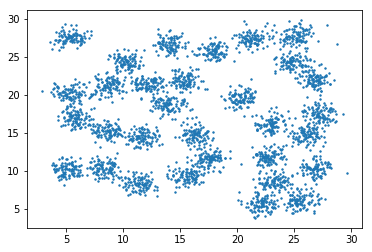

In [22]:
a = np.loadtxt('D31.txt')
data = a[:,:a.shape[1]-1]
plt.scatter(a[:,0],a[:,1],s=2)

Random Initialization

In [23]:
k = len(np.unique(a[:,a.shape[1]-1]))
cs_old = np.zeros((k,data.shape[1]))
cs_new = data[np.random.permutation(data.shape[0])[0:k]]

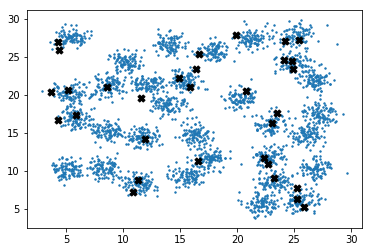

In [24]:
plt.scatter(data[:,0],data[:,1],s = 2)
plt.scatter(cs_new[:,0],cs_new[:,1],s=50,marker = 'X', c='black')

K-Means Algorithm

In [27]:
er = np.linalg.norm(cs_new - cs_old)
print(er)

distance = np.zeros((data.shape[0],k))
cluster_assigned = np.zeros(data.shape[0])

cs_init = np.array(cs_new)
print(cs_new)
for iter1 in range(100):
    for i in range(k):
        distance[:,i] = np.linalg.norm(data - cs_new[i], axis=1)
    
    cluster_assigned = np.argmin(np.array(distance),axis = 1)
    cs_old = np.array(cs_new)
    
    for i in range(k):
        cs_new[i] = np.mean(data[cluster_assigned==i],axis=0)
    er = np.linalg.norm(cs_new - cs_old)
    if er < 1e-9:
        print('#iter', iter1)
        break

149.04769718533058
[[23.2781  9.0227]
 [23.0895 16.3666]
 [24.1498 24.6788]
 [24.8513 24.4856]
 [14.9314 22.181 ]
 [16.5575 11.3388]
 [15.8905 21.1069]
 [23.4713 17.6132]
 [11.5343 19.5636]
 [22.687  10.8949]
 [22.3581 11.6424]
 [ 4.3284 26.9972]
 [ 4.3192 16.661 ]
 [11.3457  8.8111]
 [16.661  25.447 ]
 [10.9064  7.2655]
 [25.8587  5.2208]
 [25.217   7.7531]
 [20.7849 20.4767]
 [24.8605 23.4437]
 [25.4148 27.2663]
 [16.4356 23.4874]
 [24.228  27.1076]
 [ 5.8441 17.3993]
 [ 3.6499 20.364 ]
 [ 5.184  20.5963]
 [25.2653  6.2466]
 [ 4.3652 25.9622]
 [11.9644 14.2322]
 [ 8.6317 21.1184]
 [19.9339 27.9149]]
#iter 24


Final cluster centres - Black x

Initial cluster centres - green o

We can observe these centres converging to their cluster centres considering the initial clusters. They are minimizing the sum of intracluster distances

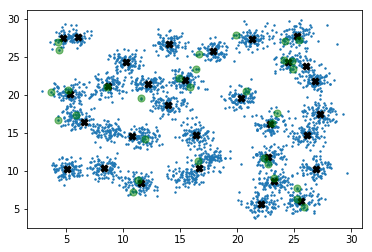

In [30]:
plt.scatter(data[:,0],data[:,1],s = 2)
plt.scatter(cs_new[:,0],cs_new[:,1],s=50,marker = 'X', c='black')
plt.scatter(cs_init[:,0],cs_init[:,1],s=50,marker = 'o', c='g', alpha=0.5)